In [294]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tbcontrol
tbcontrol.expectversion('0.1.3')

In [295]:
K = 0.6423 # Data from part 1
τ = 150.312
θ = 17.397

Kc = 18.55
τI = 41.49
τD = 6.30

ts = np.linspace(0, 500, 1000)
dt = ts[1]

In [309]:
# An attempt to do a numerical version of the discrete controller, code from the "Discrete control notebook"
# Doesn't work well because im not sure how to do the numerical version of the sum/ delta e terms
# Doesn't reach setpoint

y_continuous = []
u_continuous = []
y = 0
sp = 5

e_list = [0]
e_array = np.array(e_list)

for t in ts:
    e = sp - y
    e_list.append(e)
    k = 1
    u = Kc*(e + DeltaT/τI * sum(e_array*dt) + τD/DeltaT*(e_list[k] - e_list[k - 1]))
    dydt = 1/τ*(K*u - y)

    
    y += dydt*dt
    k += 1
    
    u_continuous.append(u)
    y_continuous.append(y)

In [310]:
def plot_continuous():
    fig, [ax_u, ax_y] = plt.subplots(2, 1, sharex=True)
    ax_u.plot(ts, u_continuous) # Comment out 
    ax_y.plot(ts, y_continuous) # Comment out 
    ax_y.axhline(5)
    ax_u.set_ylabel('$u(t)$')
    ax_y.set_ylabel('$y(t)$')
    ax_y.set_xlabel('time')
    
    return ax_u, ax_y

(<matplotlib.axes._subplots.AxesSubplot at 0x1c240bfc18>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c241080f0>)

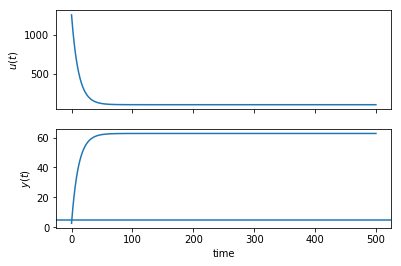

In [311]:
plot_continuous()

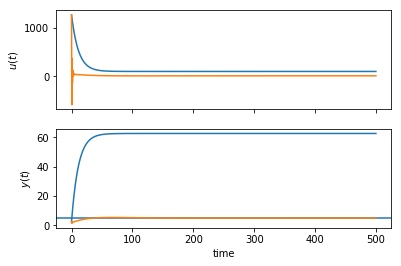

In [312]:
# An attempt to do my own version of the discrete control stuff and test it on a FOPDT model (K, τ above)
# Comment out the continuous plots to see the discrete graph nicely - it does reach setpoint

u_discrete = []
y_discrete = []

DeltaT = 0.5 # sampling time

ek_1=0
ek=0
sum_e=0
y = 0
sp = 5
next_sample = 0
for t in ts:
    if t >= next_sample:
        ek_1 = ek
        ek = sp - y
        sum_e += ek
        u = Kc*(ek + DeltaT/τI * sum_e + τD/DeltaT*(ek-ek_1))
        next_sample += DeltaT
    dydt = 1/τ*(K*u - y)
    y += dydt*dt
    
    u_discrete.append(u)
    y_discrete.append(y)

ax_u, ax_y = plot_continuous()
ax_u.plot(ts, u_discrete)
ax_y.plot(ts, y_discrete)

In [313]:
# Code from group 6:

In [314]:
import sympy
sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt
import pandas
import control
from random import gauss
import tclab
%matplotlib inline
import scipy
from scipy.integrate import odeint
from scipy.optimize import fsolve
import scipy.optimize
import scipy.signal
from tbcontrol import blocksim
s = control.tf([1, 0], 1)

In [315]:
def position_form(Tset, Kc_PID, τI_PID, τD_PID, Δt, connect, tspan, filename):  
    
    TCLab = tclab.setup(connected=connect, speedup=100)
    with TCLab() as lab:
        h = tclab.Historian(lab.sources)
        plot = tclab.Plotter(h, tspan)
        
        e_I, dedt, e1 = 0, 0, 0
        bias = (1/0.85)*(Tset-25)
        for t in tclab.clock(tspan+200, step=Δt):
            
            if t >= tspan:
                lab.Q1(0)
            else:
                
                e = Tset - lab.T1
                e_I += e
                dedt = e1 - e 
                p = bias + Kc_PID*(e + (Δt/τI_PID)*e_I + (τD_PID/Δt)*(dedt))
                e1 = e
                lab.Q1(p)

            plot.update(t)
    h.to_csv(filename)

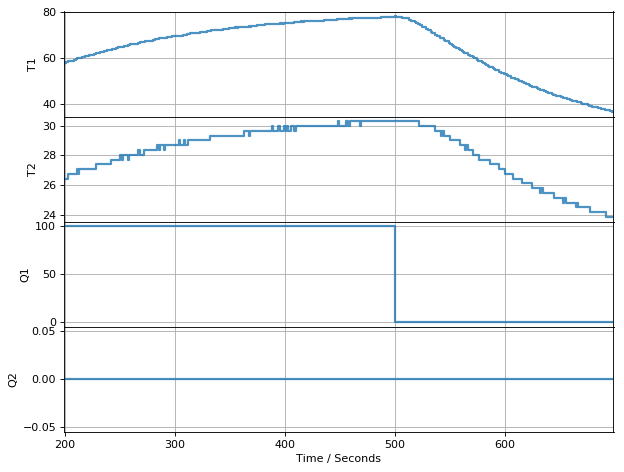

TCLab Model disconnected successfully.


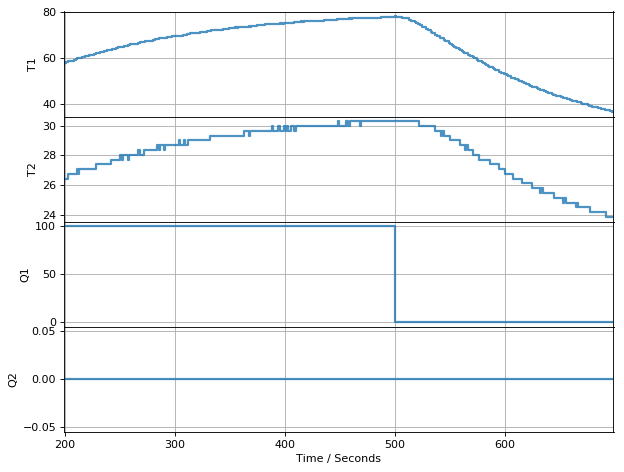

In [291]:
position_form(63, 18.55, 41.49, 6.30, 1, False, 1000, 'Test.csv')
# These are our parameters

In [ ]:
K = 0.6423
τ = 150.312
θ = 17.397

Kc = 18.55
τI = 41.49
τD = 6.30

In [ ]:

# Tset, Kc_PID, τI_PID, τD_PID, Δt, connect, tspan, filename

# T1_list = []
# Q1_list = []

# e_I, dedt, e1 = 0, 0, 0

# bias = 0

# for t in (tspan+200, step=Δt):

#         e = Tset - T1
#         e_I += e
#         dedt = e1 - e 
#         p = bias + Kc_PID*(e + (Δt/τI_PID)*e_I + (τD_PID/Δt)*(dedt))
#         e1 = e
        
#         T1_list.append(T)

#     plot.update(t)
# winsound.Beep(400, 500) #Test end, switch fan off
# h.to_csv(filename)

Here's an attempt to solve the continuous problem using sympy, but the laplace stuff 

In [258]:
import sympy
sympy.init_printing()

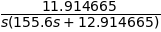

In [141]:
s = sympy.Symbol('s')
t = sympy.Symbol('t', positive=True)

α = 0.01
Kc = 18.55
τI = 41.49
τD = 6.30

Gc = Kc*(1 + 1/(τI*s))  # controller + τD*s/(α*τD*s + 1)
G = K/(tau*s + 1)  # system

G_cl = Gc*G/(1 + Gc*G)

rs = 1/s  # step input r(s)

ys = rs*G_cl  # system output y(s)
es = rs - ys  # error
us = Gc*es  # controller output

us.collect(s)
ys.collect(s)

In [147]:
yt = sympy.inverse_laplace_transform(ys.collect(s).simplify(), s, t)
# ut = sympy.inverse_laplace_transform(us.collect(s).simplify(), s, t)

In [148]:
sympy.plot(ut, (t, 0, 100), ylim=(0,2))
sympy.plot(yt, (t, 0, 100), ylim=(0,2))

NameError: name 'ut' is not defined

In [132]:
import tbcontrol
tbcontrol.expectversion("0.1.1")

from tbcontrol import blocksim
import numpy
import matplotlib.pyplot as plt

%matplotlib inline

In [87]:
Gp = blocksim.LTI('Gp', 'u', 'y', K, [τ, 1], θ)

Gc = blocksim.PI('Gc', 'e', 'u', 12.235237180068426, 46.58043287192015)

diagram = blocksim.Diagram([Gp, Gc], 
                           sums={'e': ('+ysp', '-y')}, 
                           inputs={'ysp': blocksim.step(initial=0, size=5)})

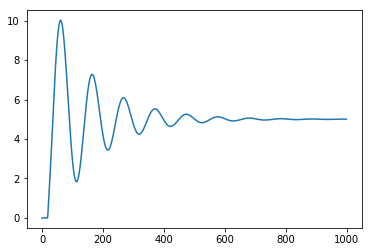

In [133]:
ts = numpy.arange(start=0, stop=1000, step=1)
simulation_results = diagram.simulate(ts, progress=True)
plt.plot(ts, simulation_results['y'], label = 'y')

In [134]:
blocksim.DiscreteTF?